In [1]:
import warnings
warnings.filterwarnings('ignore')

# IMPORT LIBRARYS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# IMPORT FILE

In [3]:
data = pd.read_csv("tested.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.shape

(418, 12)

# CLEANING AND PRE-PROCESSING

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
data = data.replace(['male','female'],[1,0])

In [9]:
data.rename(columns={'Sex': 'Sex_is_male'}, inplace=True)

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex_is_male,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


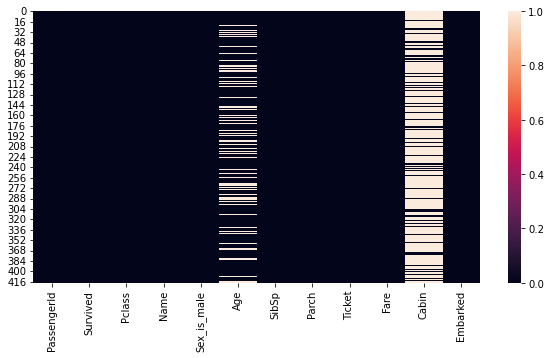

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

In [12]:
data = data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1)

In [13]:
age_mean = data["Age"].mean()
data['Age'].fillna(age_mean, inplace=True)

In [14]:
data= data.dropna()

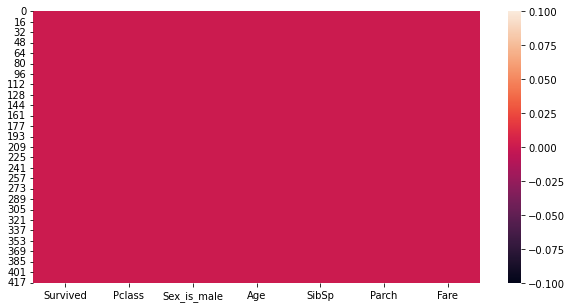

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
plt.show()

In [16]:
data.isnull().sum().sum()

0

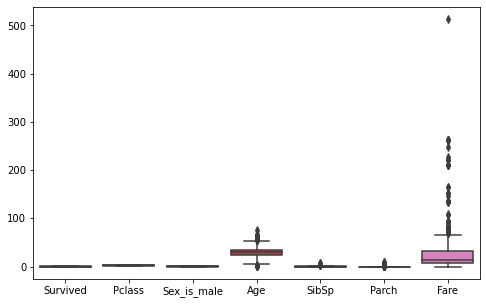

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data)
plt.show()

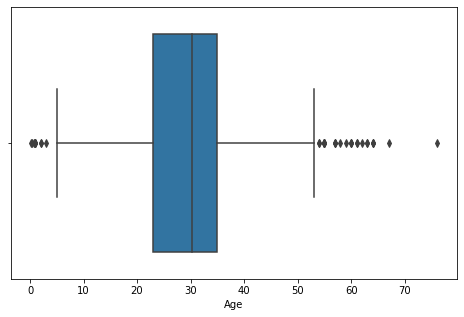

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Age",data=data)
plt.show()

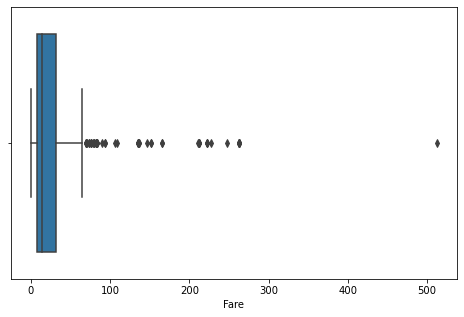

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Fare",data=data)
plt.show()

In [20]:
data = data[data['Fare'] < 500]

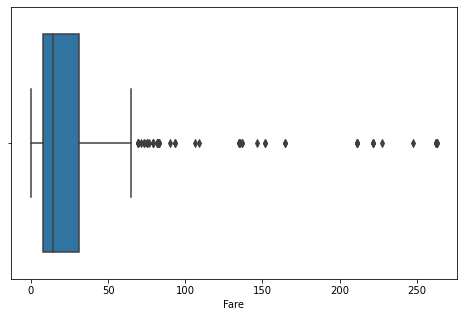

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Fare",data=data)
plt.show()

# EXPLORATORY DATA ANALYTICS

In [22]:
data.describe()

,Survived,Pclass,Sex_is_male,Age,SibSp,Parch,Fare
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,0.362981,2.266827,0.637019,30.133276,0.449519,0.391827,34.481270
std,0.481438,0.840800,0.481438,12.503083,0.898379,0.983150,50.835958
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.415625
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,263.000000


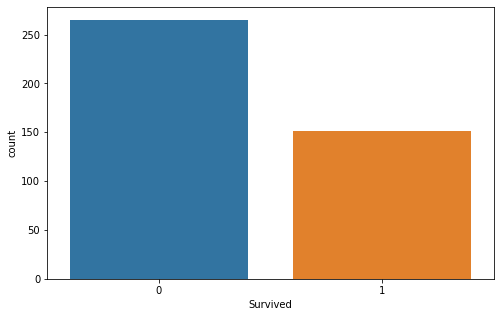

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=data)

plt.show()

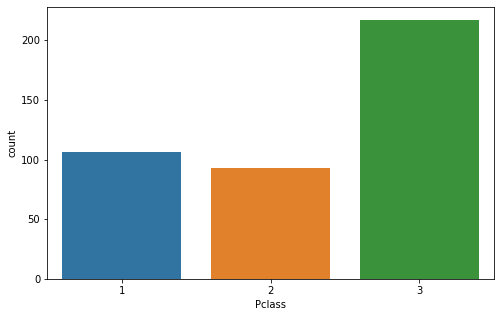

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', data=data)

plt.show()

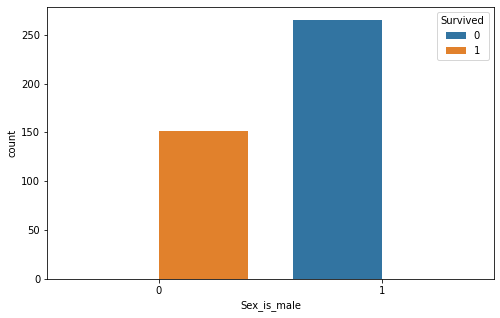

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex_is_male', data=data, hue='Survived')

plt.show()

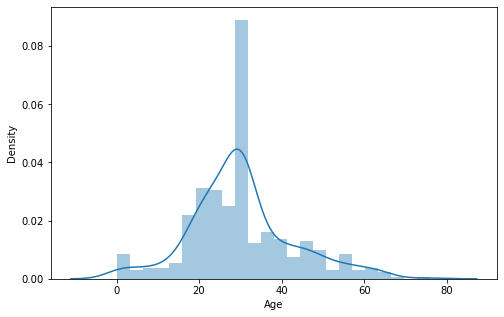

In [26]:
plt.figure(figsize=(8,5))
sns.distplot(data["Age"])
plt.show()

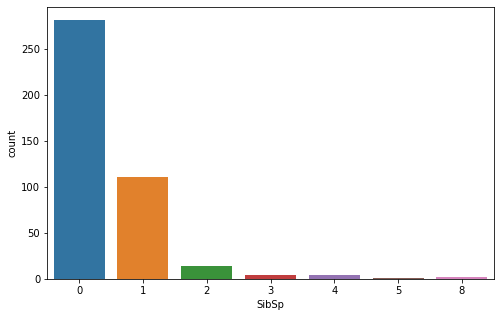

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x='SibSp', data=data)

plt.show()

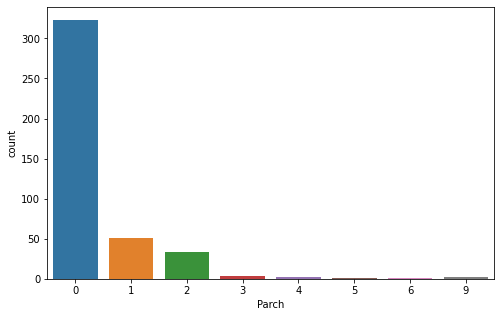

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='Parch', data=data)

plt.show()

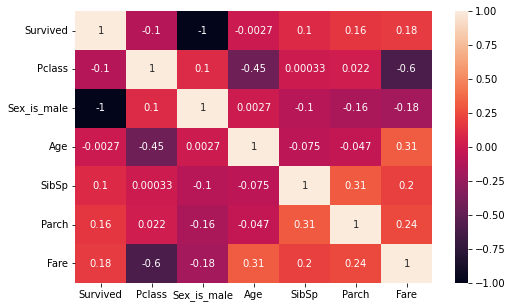

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# SPLIT THE DATASET

In [30]:
x = data.drop("Survived", axis=1)
y = data["Survived"]

print("Shape of X = ",x.shape)
print("Shape of Y = ",y.shape)

Shape of X =  (416, 6)
Shape of Y =  (416,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

print("Shape of X_train = ", x_train.shape)
print("Shape of X_test = ", x_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (291, 6)
Shape of X_test =  (125, 6)
Shape of y_train =  (291,)
Shape of y_test =  (125,)


# MODEL FITTING

In [32]:
svc = SVC(kernel='poly', degree=14)

svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.68

# PREDICTION

In [33]:
y_pred = svc.predict(x_test)

In [34]:
pre_table = pd.DataFrame({"Y_Actual":y_test, "Y_Predicted":y_pred})
pre_table.tail(10)

,Y_Actual,Y_Predicted
270,0,0
202,0,0
120,1,0
158,0,0
375,1,1
372,0,0
145,0,0
248,1,0
244,0,0
74,1,1
